In [5]:
import numpy as np, pandas as pd, os, glob, scipy.stats



In [6]:
all_f = glob.glob("../flight-data/*wchg.csv")

In [7]:
#f = '../flight-data/pid.16970.20220119.223704.allflights-wchg.csv'
flight_col_names = ["timestamp", "icao", "flight", "airframe", "distance", "altitude", "heading", "speed", "bearing", "wind_dir", "wind_speed", "wind_gust", "alt_chg", "speed_chg", "track_chg", "lat", "long"]
stat_col_name = ["distance", "altitude", "heading", "speed", "bearing", "lat", "long"]
df = None
n = 0
sampled_f = np.random.choice(all_f, 13000, replace=False)
for f in sampled_f:
    if os.stat(f).st_size == 0:
        continue
    tmp_df = pd.read_csv(f, header=None, delimiter="|")
    tmp_df.iloc[:, 0] = pd.read_csv(f, header=None, delimiter="|", usecols=[0], dtype='str')
    tmp_df.set_axis(flight_col_names, axis=1, inplace=True)
    if df is None:
        df = tmp_df
    else:
        df = pd.concat((df, tmp_df))
    n += 1
    if n % 500 == 0:
        print(f"Read {n} of {len(all_f)}, shape is {df.shape}")

print(df.head())
print(df.shape)

Read 500 of 99681, shape is (170297, 17)
Read 1000 of 99681, shape is (328196, 17)
Read 1500 of 99681, shape is (499258, 17)
Read 2000 of 99681, shape is (710586, 17)
Read 2500 of 99681, shape is (861107, 17)
Read 3000 of 99681, shape is (1003844, 17)
Read 3500 of 99681, shape is (1120481, 17)
Read 4000 of 99681, shape is (1254508, 17)
Read 4500 of 99681, shape is (1416236, 17)
Read 5000 of 99681, shape is (1564804, 17)
Read 5500 of 99681, shape is (1691335, 17)
Read 6000 of 99681, shape is (1838697, 17)
Read 6500 of 99681, shape is (1986037, 17)
Read 7000 of 99681, shape is (2159736, 17)
Read 7500 of 99681, shape is (2317602, 17)
Read 8000 of 99681, shape is (2555896, 17)
Read 8500 of 99681, shape is (2670235, 17)
Read 9000 of 99681, shape is (2820394, 17)
Read 9500 of 99681, shape is (2957086, 17)
Read 10000 of 99681, shape is (3107923, 17)
Read 10500 of 99681, shape is (3220142, 17)
Read 11000 of 99681, shape is (3372783, 17)
Read 11500 of 99681, shape is (3533842, 17)
Read 12000 of

In [8]:

print(f"Before filtering {df.shape}")
df = df[df.altitude != df.alt_chg - 1]
df = df[df.altitude < 50000]
df = df[df.distance < 200]
df = df[df.speed < 600]
print(f"After filtering {df.shape}")
df = df.dropna()
print(f"After dropna() {df.shape}")

Before filtering (3946222, 17)
After filtering (3834797, 17)
After dropna() (3479813, 17)


In [9]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, DBSCAN
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
print(df[stat_col_name].head())
scaled_stats = mm_scaler.fit_transform(df[stat_col_name])
print(pd.DataFrame(scaled_stats, columns=[stat_col_name]))

     distance  altitude  heading  speed     bearing       lat      long
1   26.685487   19250.0    264.5  386.8  241.990360  40.25500 -74.46954
2   68.149832    9725.0     43.0  325.5  254.860806  40.20540 -74.96640
3   49.857401    6600.0     60.0  235.7  281.277291  40.45422 -74.76970
4  103.456081   18000.0    227.0  331.1  255.828987  40.13429 -75.37158
5   62.538434   19575.0     98.6  412.7  355.155938  40.92822 -74.25484
         distance  altitude   heading     speed   bearing       lat      long
0        0.133333  0.399411  0.734926  0.644774  0.672198  0.510585  0.484188
1        0.340680  0.212463  0.119478  0.542590  0.707949  0.495535  0.368653
2        0.249207  0.151129  0.166713  0.392899  0.781329  0.571035  0.414392
3        0.517233  0.374877  0.630731  0.551925  0.710638  0.473958  0.274437
4        0.312620  0.405790  0.273965  0.687948  0.986549  0.714863  0.534112
...           ...       ...       ...       ...       ...       ...       ...
3479808  0.323930  0.1

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(stat_col_name))
pca.fit(scaled_stats)
print(np.float16(pca.explained_variance_ratio_))
print(pca.singular_values_)
print(pca.score(scaled_stats))

[0.3652  0.2534  0.2118  0.09155 0.04288 0.0201  0.01508]
[611.43486019 509.4112006  465.73165665 306.20083654 209.53647945
 143.42357051 124.26741623]
3.1360913944458377


In [11]:
df['pca_scores'] = pca.score_samples(scaled_stats)
df.sort_values(by = 'pca_scores')

,timestamp,icao,flight,airframe,distance,altitude,heading,speed,bearing,wind_dir,wind_speed,wind_gust,alt_chg,speed_chg,track_chg,lat,long,pca_scores
20012,20221118.110530,ADF4E9,JBU209,A321,199.464380,31325.0,182.0,405.2,130.534930,230.0,8.0,8.0,0.0,-1.0,0.0,39.18910,-72.43358,-43.156461
19994,20221118.110523,ADF4E9,JBU209,A321,199.464380,31325.0,182.0,406.2,130.534930,230.0,8.0,8.0,1975.0,-56.6,34.1,39.18910,-72.43358,-43.123874
1450,20230111.045331,ACFE9D,N9362M,C172,50.352277,49700.0,24.4,104.3,198.792906,20.0,4.0,4.0,47375.0,0.0,0.0,39.93929,-74.38220,-42.706680
19789,20221118.110350,ADF4E9,JBU209,A321,199.464380,29350.0,147.9,462.8,130.534930,230.0,8.0,8.0,0.0,0.0,0.0,39.18910,-72.43358,-42.020675
19854,20221118.110421,ADF4E9,JBU209,A321,199.464380,29350.0,147.9,462.8,130.534930,230.0,8.0,8.0,0.0,0.0,0.0,39.18910,-72.43358,-42.020675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20220601.232055,AA7E79,UAL1560,B738,54.965019,11300.0,130.4,291.6,257.927618,130.0,6.0,6.0,-250.0,-1.1,18.7,40.26292,-74.82526,6.167557
163,20220601.232151,AA7E79,UAL1560,B738,54.480037,11100.0,147.9,291.6,256.776935,130.0,6.0,6.0,-200.0,0.0,17.5,40.25428,-74.81677,6.170336
28,20220725.171328,ADA699,RPA3598,E170,54.222319,12000.0,141.7,285.5,257.492337,310.0,15.0,15.0,0.0,-3.7,5.7,40.26075,-74.81565,6.173945
20,20220725.171322,ADA699,RPA3598,E170,54.411095,12000.0,136.0,289.2,257.878888,310.0,15.0,15.0,-25.0,290.2,135.0,40.26359,-74.81877,6.175471


In [12]:
cluster_model = KMeans(n_clusters = 100) #DBSCAN(eps=0.3, min_samples=120)

cluster_pred = cluster_model.fit_predict(scaled_stats)
#print("DBSCAN core examples", len(dbscan_model.core_sample_indices_))
print(f"{np.transpose(np.unique(cluster_pred, return_counts=True))}")
#dbscan_not_core = np.full(len(scaled_stats), True)
#dbscan_not_core[dbscan_model.core_sample_indices_] = False

import matplotlib.pyplot as plt
'''
pca = PCA(n_components=2)
projected = pca.fit_transform(scaled_stats)
print(projected.shape)
plt.scatter(x = projected[:, 0], y = projected[:, 1], c = dbscan_pred)
'''

[[    0 44032]
 [    1 41968]
 [    2 37829]
 [    3 39152]
 [    4 54762]
 [    5 51773]
 [    6 32038]
 [    7 19580]
 [    8 74031]
 [    9 44332]
 [   10 44637]
 [   11 63834]
 [   12 32413]
 [   13 19292]
 [   14 15098]
 [   15 54271]
 [   16 69321]
 [   17 48426]
 [   18 57947]
 [   19 39392]
 [   20 42790]
 [   21 37264]
 [   22 73233]
 [   23 32936]
 [   24 22512]
 [   25 37219]
 [   26 25110]
 [   27 24333]
 [   28 81115]
 [   29 19667]
 [   30 22953]
 [   31 29240]
 [   32 25962]
 [   33 24445]
 [   34 27332]
 [   35 62007]
 [   36 18453]
 [   37 17167]
 [   38 26214]
 [   39 18950]
 [   40 18944]
 [   41 30156]
 [   42 39224]
 [   43 38551]
 [   44 39137]
 [   45 18207]
 [   46 32382]
 [   47 31581]
 [   48 27322]
 [   49 53735]
 [   50 37059]
 [   51 48391]
 [   52 24830]
 [   53 15907]
 [   54 40045]
 [   55 31270]
 [   56 57903]
 [   57 50730]
 [   58  9175]
 [   59 28419]
 [   60 29671]
 [   61 23753]
 [   62 45433]
 [   63 28492]
 [   64 19321]
 [   65 60558]
 [   66 19

'\npca = PCA(n_components=2)\nprojected = pca.fit_transform(scaled_stats)\nprint(projected.shape)\nplt.scatter(x = projected[:, 0], y = projected[:, 1], c = dbscan_pred)\n'

In [18]:
print(len(cluster_pred), df.shape)
print(cluster_model.inertia_/df.shape[0])

3479813 (3479813, 18)
0.016757255290357598


<BarContainer object of 100 artists>

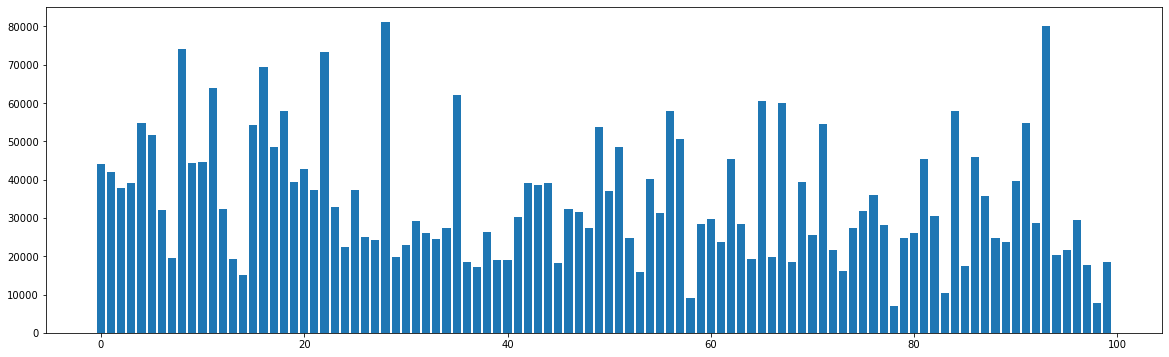

In [25]:
cluster_freq_df = pd.DataFrame(np.transpose(np.unique(cluster_pred, return_counts=True)), columns=["ClusterID", "Count"])
plt.figure(figsize=(20, 6))
plt.bar(x = cluster_freq_df.ClusterID, height = cluster_freq_df.Count)


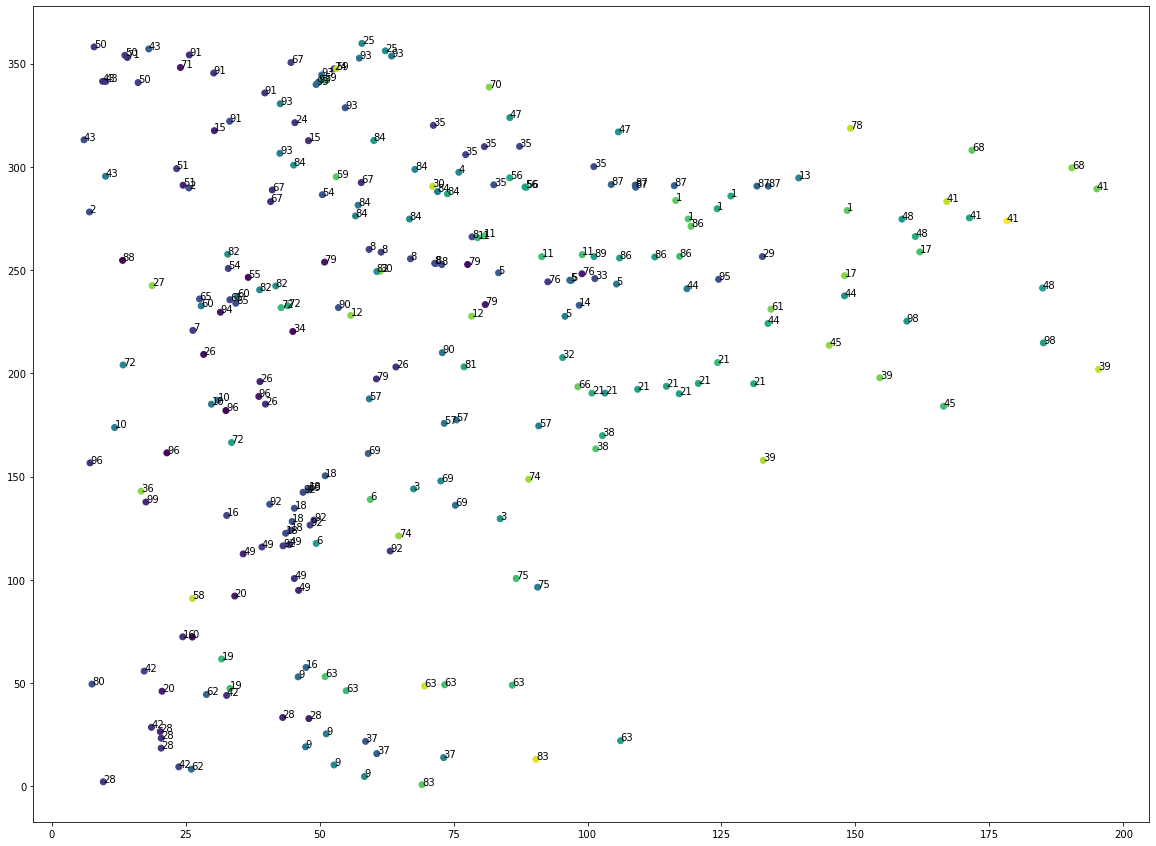

In [141]:
df['ClusterID'] = cluster_pred
sample_idx = np.random.choice(range(len(df)), 250, replace=False)
sample_df = df.iloc[sample_idx]
sample_pred = cluster_pred[sample_idx]

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.scatter(sample_df['distance'], sample_df['bearing'], c = sample_df['altitude'])

for i, txt in enumerate(sample_pred):
    ax.annotate(txt, (sample_df['distance'].iloc[i], sample_df['bearing'].iloc[i]))

In [26]:


df[(df.ClusterID == -1) & (df.pca_scores < -30)]

,timestamp,icao,flight,airframe,distance,altitude,heading,speed,bearing,wind_dir,wind_speed,wind_gust,alt_chg,speed_chg,track_chg,lat,long,pca_scores,ClusterID


In [89]:
df['DT'] = pd.to_datetime(df.timestamp, format = "%Y%m%d.%H%M%S")


# Explore routing through clusters
sorted_df = df.sort_values(by=['icao', 'DT'])

sorted_print_cols = ['icao', 'flight', 'DT', 'ClusterID', 'pca_scores']
sorted_print_cols.extend(stat_col_name)
#print(sorted_print_cols)
for flight in np.random.choice(df.flight, 15, replace=False):
    print(flight)
    print(sorted_df[sorted_df.flight == flight].loc[:, sorted_print_cols].head(20))



AAL2303
       icao   flight                  DT  ClusterID  pca_scores    distance  \
112  A897F4  AAL2303 2022-07-14 22:39:58         93    2.534045   51.928165   
165  A897F4  AAL2303 2022-07-14 22:40:46         93    2.534045   51.928165   
187  A897F4  AAL2303 2022-07-14 22:41:09         93    2.886889   50.752553   
5    A95665  AAL2303 2022-08-08 22:31:10         89    5.303159  106.992885   
134  A95665  AAL2303 2022-08-08 22:32:40         89    5.154205  112.177084   
8    A95A1C  AAL2303 2022-09-03 22:23:13         84    5.416365   55.821854   
150  A95A1C  AAL2303 2022-09-03 22:25:11         84    5.488104   59.533393   
35   A9653D  AAL2303 2022-10-31 23:48:41         48    2.553099  161.958142   
81   A9653D  AAL2303 2022-10-31 23:49:23         48    2.383827  163.772779   
135  A9653D  AAL2303 2022-10-31 23:50:11         48    2.295390  164.845788   
2    A968F8  AAL2303 2022-07-13 00:44:07         42    4.659792   18.756629   
9    A968F8  AAL2303 2022-07-13 00:44:10    

In [94]:
sorted_df['Date_str'] = sorted_df.DT.dt.strftime("%Y%m%d")
continuous_obs = sorted_df.groupby(['Date_str', 'flight'])['timestamp'].count()
for date_str, flt in np.random.choice(continuous_obs[continuous_obs > 40].index, 20, replace=False):
    print(date_str, flt)
    print(sorted_df[(sorted_df.flight == flt) & (sorted_df.Date_str == date_str)].head(20))

20220212 AAL974
             timestamp    icao  flight airframe   distance  altitude  heading  \
14375  20220212.105213  AA1DCD  AAL974     B772  70.037830    9050.0    313.4   
14393  20220212.105222  AA1DCD  AAL974     B772  69.598152    9050.0    313.2   
14413  20220212.105232  AA1DCD  AAL974     B772  68.076548    9050.0    313.3   
14429  20220212.105239  AA1DCD  AAL974     B772  64.978870    9025.0    313.4   
14439  20220212.105247  AA1DCD  AAL974     B772  64.978870    9025.0    313.4   
14448  20220212.105251  AA1DCD  AAL974     B772  63.248323    9025.0    313.4   
14468  20220212.105303  AA1DCD  AAL974     B772  62.059692    9050.0    313.4   
14481  20220212.105310  AA1DCD  AAL974     B772  60.119624    9050.0    313.3   
14498  20220212.105319  AA1DCD  AAL974     B772  59.728317    9050.0    313.3   
14517  20220212.105329  AA1DCD  AAL974     B772  57.979051    9025.0    313.4   
14533  20220212.105339  AA1DCD  AAL974     B772  55.878315    9025.0    313.3   
14553  20220

In [135]:

def get_all_data_one_flight(flightid):
    tmp = pd.read_csv("/Users/brunner/unix/flight-data/flight_date_files.txt", delimiter=" ", header=None, names=["files", "date", "flight"])
    return tmp[tmp.flight == flightid]

watch_flight = "UAL149"

flight_files_df = (get_all_data_one_flight(watch_flight))
flight_df = None
n=0
for f in flight_files_df.files:
    tmp_df = pd.read_csv(f, header=None, delimiter="|")
    tmp_df.iloc[:, 0] = pd.read_csv(f, header=None, delimiter="|", usecols=[0], dtype='str')
    tmp_df.set_axis(flight_col_names, axis=1, inplace=True)
    if flight_df is None:
        flight_df = tmp_df[tmp_df.flight == watch_flight]
    else:
        flight_df = pd.concat((flight_df, tmp_df[tmp_df.flight == watch_flight]))
    n += 1
    if n % 50 == 0:
        print(f"Read {n} of {len(flight_files_df)}, shape is {flight_df.shape}")

/var/folders/fq/0yxqjvw16k32n2gbtfcq88480000gn/T/ipykernel_42802/2149424963.py:7: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  flight_files_df = (get_all_data_one_flight(watch_flight))


Read 50 of 812, shape is (1399, 17)
Read 100 of 812, shape is (2364, 17)
Read 150 of 812, shape is (3316, 17)
Read 200 of 812, shape is (4153, 17)
Read 250 of 812, shape is (5206, 17)
Read 300 of 812, shape is (6702, 17)
Read 350 of 812, shape is (7811, 17)
Read 400 of 812, shape is (8681, 17)
Read 450 of 812, shape is (10045, 17)
Read 500 of 812, shape is (10963, 17)
Read 550 of 812, shape is (12125, 17)
Read 600 of 812, shape is (13270, 17)
Read 650 of 812, shape is (14385, 17)
Read 700 of 812, shape is (15572, 17)
Read 750 of 812, shape is (16459, 17)
Read 800 of 812, shape is (17459, 17)


In [165]:
flight_df['DT'] = pd.to_datetime(flight_df.timestamp, format = "%Y%m%d.%H%M%S")
flight_df['Date_str'] = flight_df.DT.dt.strftime("%Y%m%d")
#flight_df.groupby(["Date_str", "airframe"]).count()

mm_scaler = pickle.load(open("mm_scaler.pkl", 'rb'))
cluster_model = pickle.load(open("kmeans_flight_cluster.pkl", 'rb'))
scaled_stats = mm_scaler.transform(flight_df[stat_col_name])
print(scaled_stats)

flight_pred = cluster_model.predict(scaled_stats)
flight_df['ClusterID'] = flight_pred
sorted_flight_df = sorted_df = flight_df.sort_values(by=['icao', 'DT'])
print(sorted_flight_df)

[[0.19741266 0.4205103  0.31981106 ... 0.34041726 0.48669594 0.63982263]
 [0.20893446 0.42590775 0.32008891 ... 0.33924866 0.48399538 0.64557309]
 [0.21009336 0.42639843 0.32008891 ... 0.33913575 0.48372532 0.64615209]
 ...
 [0.15712447 0.21344455 0.54459572 ... 0.98042045 0.6299987  0.53809074]
 [0.15396708 0.21638862 0.54515143 ... 0.97899536 0.62819326 0.53755127]
 [0.14568667 0.22473013 0.54515143 ... 0.97503093 0.62342935 0.5361747 ]]
            timestamp    icao  flight airframe    distance  altitude  heading  \
4788  20220726.050747  A1A2A2  UAL149     B772   22.627283    3800.0    207.5   
4792  20220726.050750  A1A2A2  UAL149     B772   22.284353    3900.0    203.3   
4794  20220726.050751  A1A2A2  UAL149     B772   22.177595    3925.0    201.9   
4800  20220726.050756  A1A2A2  UAL149     B772   21.548934    4075.0    195.3   
4810  20220726.050802  A1A2A2  UAL149     B772   20.937549    4250.0    190.9   
...               ...     ...     ...      ...         ...       ...  

In [212]:
flight_path_counts_df = pd.DataFrame(sorted_flight_df.groupby(['Date_str', 'icao', 'airframe'])['ClusterID'].value_counts(normalize=True))
flight_path_counts_df.columns = ["Count"]
flight_path_counts_df.groupby('ClusterID').agg(['min', 'max', 'mean', 'count'])

Count                          
                min       max      mean count
ClusterID                                    
2          0.089744  0.089744  0.089744     1
3          0.010000  0.133333  0.064831    16
6          0.062500  0.700000  0.326238   305
9          0.041667  0.041667  0.041667     1
10         0.010000  0.583333  0.171229   241
15         0.033333  0.294872  0.114922     4
16         0.010638  0.188235  0.038316    33
18         0.015625  0.084746  0.050124     3
32         0.044776  0.367347  0.183018    17
37         0.030303  0.125000  0.077652     2
38         0.017857  0.085714  0.053190     3
42         0.009615  0.250000  0.050246    13
43         0.020000  0.677419  0.316589   326
45         0.038462  0.186275  0.103669     5
52         0.020833  0.588235  0.223344   195
53         0.009615  0.363636  0.083255    95
54         0.009804  0.250000  0.128209     4
57         0.017857  0.017857  0.017857     1
60         0.014085  0.070000  0.033613    13
62         0.009091  0.433735  0.038431   111
69         0.012195  0.285714  0.065322    40
74         0.008000  0.009804  0.008902     2
75         0.012987  0.291667  0.069395    26
80         0.009091  0.080000  0.022974    17
81         0.017857  0.384615  0.205008    29
91         0.009804  0.421053  0.131242   166
93         0.130435  0.130435  0.130435     1

In [219]:
flight_df[flight_df.ClusterID.isin([93, 57, 9, 2])]

,timestamp,icao,flight,airframe,distance,altitude,heading,speed,bearing,wind_dir,wind_speed,wind_gust,alt_chg,speed_chg,track_chg,lat,long,DT,Date_str,ClusterID
122,20220423.024627,A21679,UAL149,B77W,29.502783,10825.0,240.7,321.0,327.315692,340.0,9.0,9.0,125.0,17.3,-2.1,40.59109,-74.38062,2022-04-23 02:46:27,20220423,93
177,20220423.024658,A21679,UAL149,B77W,29.496382,11000.0,228.7,335.2,324.557997,340.0,9.0,9.0,175.0,14.2,-12.0,40.58387,-74.39448,2022-04-23 02:46:58,20220423,93
183,20220423.024706,A21679,UAL149,B77W,29.496382,11000.0,228.7,335.2,324.557997,340.0,9.0,9.0,0.0,0.0,0.0,40.58387,-74.39448,2022-04-23 02:47:06,20220423,93
2647,20230205.043959,A1F557,UAL149,B772,92.575049,23950.0,118.9,504.9,151.931911,190.0,8.0,8.0,1000.0,3.2,0.2,39.63248,-73.68353,2023-02-05 04:39:59,20230205,57
2650,20230205.044000,A1F557,UAL149,B772,92.773619,23950.0,118.8,505.8,151.852314,190.0,8.0,8.0,0.0,0.9,-0.1,39.63144,-73.68112,2023-02-05 04:40:00,20230205,57
537,20220325.020019,A28DC8,UAL149,B77W,14.074245,17125.0,98.4,405.3,50.689675,20.0,12.0,12.0,425.0,3.5,-0.5,40.44809,-74.06335,2022-03-25 02:00:19,20220325,9
607,20220825.033124,AAA125,UAL149,B772,6.493036,7150.0,128.2,281.3,279.211515,290.0,7.0,7.0,225.0,1.4,0.0,40.37732,-74.26764,2022-08-25 03:31:24,20220825,2
620,20220825.033131,AAA125,UAL149,B772,5.813670,7375.0,128.4,281.9,275.324379,290.0,7.0,7.0,225.0,0.6,0.2,40.37283,-74.26031,2022-08-25 03:31:31,20220825,2
632,20220825.033137,AAA125,UAL149,B772,5.258004,7575.0,128.7,283.1,271.268606,290.0,7.0,7.0,200.0,1.2,0.3,40.36903,-74.25403,2022-08-25 03:31:37,20220825,2
645,20220825.033142,AAA125,UAL149,B772,4.646979,7800.0,128.7,283.1,265.212062,290.0,7.0,7.0,225.0,0.0,0.0,40.36450,-74.24664,2022-08-25 03:31:42,20220825,2
